In [96]:
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
from IPython.display import IFrame
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import sys
import os
import xarray as xr
from datetime import datetime

In [97]:
# pip install xarray

In [98]:
from pathlib import Path

In [99]:
Path.cwd()

PosixPath('/media/davidhaasnoot/files/work/Studie TUD/Msc/Year 6/Q3 Thesis/CAMELS')

In [100]:
store_path = Path.cwd() / "store_gdf"

In [101]:
# data_path = r'D:\large_data_sets\CAMELS'
data_path = Path(r'/media/davidhaasnoot/files/large_data_sets/CAMELS')
figures_path = Path.cwd().parent/ "figures"

In [102]:
shape_file = list((data_path / "basin_set_full_res").glob('*.shp'))[0]
gdf_catchments = gpd.read_file(shape_file)
shape_file

PosixPath('/media/davidhaasnoot/files/large_data_sets/CAMELS/basin_set_full_res/HCDN_nhru_final_671.shp')

In [104]:
str(gdf_catchments.crs)[:10]

'EPSG:4269'

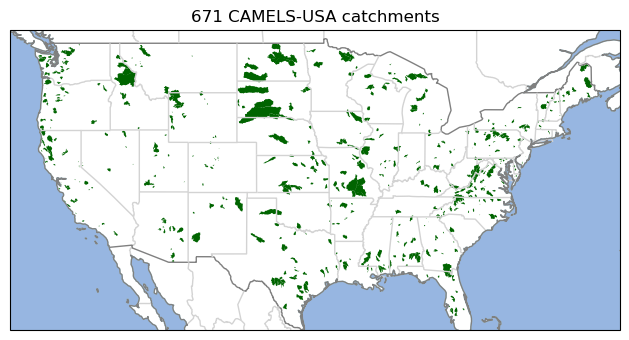

In [9]:
# fig, ax = plt.subplots()
ax = plt.axes(projection=ccrs.PlateCarree())
country_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='10m',
    facecolor='none')
ax.add_feature(country_borders, edgecolor='gray')

state_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')
ax.add_feature(state_borders, edgecolor='lightgray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, edgecolor='lightblue')

gdf_catchments.plot(ax=ax,facecolor="darkgreen")
ax.set_title(f"{len(gdf_catchments)} CAMELS-USA catchments")

plt.tight_layout()
plt.savefig(fr'{figures_path}\CAMELS-USA-catchments.png',bbox_inches="tight")

In [10]:
gdf_catchments.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [11]:
-127.27502975441944, -64.85323562638001
25.8645493511459, 50.101112651929895

(25.8645493511459, 50.101112651929895)

In [12]:
ax.get_ylim()

(25.8645493511459, 50.101112651929895)

PDF desribing the meta data availible

In [13]:
# pdf_file = glob.glob(r"*.pdf")[0]
# IFrame(pdf_file, width=1000, height=800)

In [14]:
indicator_files = list(data_path.glob('*.txt'))

In [15]:
print(indicator_files[0])
df_clim_indicators = pd.read_csv(indicator_files[0],delimiter=";")
df_clim_indicators

/media/davidhaasnoot/files/large_data_sets/CAMELS/camels_clim.txt


,gauge_id,p_mean,pet_mean,p_seasonality,frac_snow,aridity,high_prec_freq,high_prec_dur,high_prec_timing,low_prec_freq,low_prec_dur,low_prec_timing
0,1013500,3.126679,1.971555,0.187940,0.313440,0.630559,12.95,1.348958,son,202.20,3.427119,mam
1,1022500,3.608126,2.119256,-0.114530,0.245259,0.587356,20.55,1.205279,son,233.65,3.662226,jja
2,1030500,3.274405,2.043594,0.047358,0.277018,0.624111,17.15,1.207746,son,215.60,3.514262,djf
3,1031500,3.522957,2.071324,0.104091,0.291836,0.587950,18.90,1.148936,son,227.35,3.473644,djf
4,1047000,3.323146,2.090024,0.147776,0.280118,0.628929,20.10,1.165217,son,235.90,3.691706,djf
...,...,...,...,...,...,...,...,...,...,...,...,...
666,14309500,4.977781,3.122204,-0.995847,0.061255,0.627228,15.10,1.776471,djf,222.65,6.893189,jja
667,14316700,4.543400,2.277630,-0.821172,0.176337,0.501305,14.75,1.446078,djf,214.85,6.018207,jja
668,14325000,6.297437,2.434652,-0.952055,0.030203,0.386610,14.60,1.467337,djf,219.05,6.240741,jja
669,14362250,2.781676,3.325188,-0.985486,0.141500,1.195390,20.45,1.786026,djf,260.35,7.354520,jja


In [16]:
print(indicator_files[1])
df_geol_indicators = pd.read_csv(indicator_files[1],delimiter=";")
df_geol_indicators

/media/davidhaasnoot/files/large_data_sets/CAMELS/camels_geol.txt


,gauge_id,geol_1st_class,glim_1st_class_frac,geol_2nd_class,glim_2nd_class_frac,carbonate_rocks_frac,geol_porostiy,geol_permeability
0,1013500,Siliciclastic sedimentary rocks,0.815904,Basic volcanic rocks,0.179729,0.000000,0.1714,-14.7019
1,1022500,Acid plutonic rocks,0.590658,Siliciclastic sedimentary rocks,0.164618,0.000000,0.0710,-14.2138
2,1030500,Siliciclastic sedimentary rocks,0.573305,Metamorphics,0.287010,0.052140,0.1178,-14.4918
3,1031500,Siliciclastic sedimentary rocks,0.448928,Metamorphics,0.443863,0.026258,0.0747,-14.8410
4,1047000,Metamorphics,0.308488,Acid plutonic rocks,0.288613,0.000000,0.0522,-14.4819
...,...,...,...,...,...,...,...,...
666,14309500,Siliciclastic sedimentary rocks,0.863563,Basic volcanic rocks,0.095225,0.000000,0.1731,-14.8976
667,14316700,Basic volcanic rocks,0.444680,Mixed sedimentary rocks,0.373506,0.000000,0.1338,-13.5958
668,14325000,Siliciclastic sedimentary rocks,0.903702,Basic plutonic rocks,0.062996,0.000000,0.1708,-15.1799
669,14362250,Basic volcanic rocks,0.983481,Acid plutonic rocks,0.016519,0.000000,0.0887,-12.5264


In [17]:
print(indicator_files[2])
df_hydro_indicators = pd.read_csv(indicator_files[2],delimiter=";")
df_hydro_indicators

/media/davidhaasnoot/files/large_data_sets/CAMELS/camels_hydro.txt


,gauge_id,q_mean,runoff_ratio,slope_fdc,baseflow_index,stream_elas,q5,q95,high_q_freq,high_q_dur,low_q_freq,low_q_dur,zero_q_freq,hfd_mean
0,1013500,1.699155,0.543437,1.528219,0.585226,1.845324,0.241106,6.373021,6.10,8.714286,41.35,20.170732,0.000000,207.25
1,1022500,2.173062,0.602269,1.776280,0.554478,1.702782,0.204734,7.123049,3.90,2.294118,65.15,17.144737,0.000000,166.25
2,1030500,1.820108,0.555859,1.871110,0.508441,1.377505,0.107149,6.854887,12.25,7.205882,89.25,19.402174,0.000000,184.90
3,1031500,2.030242,0.576289,1.494019,0.445091,1.648693,0.111345,8.010503,18.90,3.286957,94.80,14.697674,0.000000,181.00
4,1047000,2.182870,0.656868,1.415939,0.473465,1.510238,0.196458,8.095148,14.95,2.577586,71.55,12.776786,0.000000,184.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,14309500,2.457700,0.493734,1.689890,0.459455,1.220096,0.057651,10.203129,41.10,4.835294,165.55,41.911392,0.000000,125.55
667,14316700,2.925937,0.643997,2.231023,0.508616,1.552484,0.141493,10.653569,16.15,2.543307,136.40,33.679012,0.000000,135.50
668,14325000,4.072283,0.646657,2.246135,0.480769,1.127976,0.104916,15.891946,23.80,3.216216,153.35,47.921875,0.000000,125.90
669,14362250,0.332015,0.119358,1.186040,0.518408,2.694495,0.000000,1.358552,33.55,9.867647,148.05,32.538462,0.088296,138.05


In [18]:
print(indicator_files[3])
df_catchment_names = pd.read_csv(indicator_files[3],delimiter=";")
df_catchment_names

/media/davidhaasnoot/files/large_data_sets/CAMELS/camels_name.txt


,gauge_id,huc_02,gauge_name
0,1013500,1,"Fish River near Fort Kent, Maine"
1,1022500,1,"Narraguagus River at Cherryfield, Maine"
2,1030500,1,"Mattawamkeag River near Mattawamkeag, Maine"
3,1031500,1,"Piscataquis River near Dover-Foxcroft, Maine"
4,1047000,1,"Carrabassett River near North Anson, Maine"
...,...,...,...
666,14309500,17,"WEST FORK COW CREEK NEAR GLENDALE, OR"
667,14316700,17,"STEAMBOAT CREEK NEAR GLIDE, OR"
668,14325000,17,"SOUTH FORK COQUILLE RIVER AT POWERS, OR"
669,14362250,17,"STAR GULCH NEAR RUCH, OR."


In [19]:
print(indicator_files[4])
df_soil_indicators = pd.read_csv(indicator_files[4],delimiter=";")
df_soil_indicators

/media/davidhaasnoot/files/large_data_sets/CAMELS/camels_soil.txt


,gauge_id,soil_depth_pelletier,soil_depth_statsgo,soil_porosity,soil_conductivity,max_water_content,sand_frac,silt_frac,clay_frac,water_frac,organic_frac,other_frac
0,1013500,7.404762,1.248408,0.461149,1.106522,0.558055,27.841827,55.156940,16.275732,5.376698,0.408717,0.000000
1,1022500,17.412808,1.491846,0.415905,2.375005,0.626229,59.390156,28.080937,12.037646,1.226913,0.000000,0.358472
2,1030500,19.011414,1.461363,0.459091,1.289807,0.653020,32.235458,51.779182,14.776824,1.634345,1.330278,0.022016
3,1031500,7.252557,1.279047,0.450236,1.373292,0.559123,35.269030,50.841232,12.654125,0.674594,0.000000,0.000000
4,1047000,5.359655,1.392779,0.422749,2.615154,0.561181,55.163133,34.185443,10.303622,0.000000,0.000000,0.147867
...,...,...,...,...,...,...,...,...,...,...,...,...
666,14309500,0.894595,0.894531,0.442804,1.335304,0.395703,37.751217,38.879406,23.213862,0.000000,0.000000,0.000000
667,14316700,0.879292,1.340004,0.443107,1.288301,0.584644,37.238495,38.519396,24.363634,0.000000,0.000000,0.000000
668,14325000,0.990318,0.892189,0.442249,1.425770,0.388650,38.961578,40.860260,20.068726,0.000000,0.000000,0.000000
669,14362250,0.625000,0.800111,0.442872,1.363910,0.348779,37.914394,39.602460,22.404372,0.000000,0.000000,0.000000


In [20]:
print(indicator_files[5])
df_topo_indicators = pd.read_csv(indicator_files[5],delimiter=";")
df_topo_indicators

/media/davidhaasnoot/files/large_data_sets/CAMELS/camels_topo.txt


,gauge_id,gauge_lat,gauge_lon,elev_mean,slope_mean,area_gages2,area_geospa_fabric
0,1013500,47.23739,-68.58264,250.31,21.64152,2252.70,2303.95
1,1022500,44.60797,-67.93524,92.68,17.79072,573.60,620.38
2,1030500,45.50097,-68.30596,143.80,12.79195,3676.17,3676.09
3,1031500,45.17501,-69.31470,247.80,29.56035,769.05,766.53
4,1047000,44.86920,-69.95510,310.38,49.92122,909.10,904.94
...,...,...,...,...,...,...,...
666,14309500,42.80400,-123.61091,709.83,110.42527,224.92,226.31
667,14316700,43.34984,-122.72894,952.26,119.08920,587.90,588.01
668,14325000,42.89150,-124.07065,656.53,124.96889,443.07,444.92
669,14362250,42.15401,-123.07532,875.67,109.93127,41.42,43.88


In [21]:
print(indicator_files[6])
df_vege_indicators = pd.read_csv(indicator_files[6],delimiter=";")
df_vege_indicators['dom_land_cover'] = df_vege_indicators['dom_land_cover'].apply(lambda x: x.strip())
df_vege_indicators

/media/davidhaasnoot/files/large_data_sets/CAMELS/camels_vege.txt


,gauge_id,frac_forest,lai_max,lai_diff,gvf_max,gvf_diff,dom_land_cover_frac,dom_land_cover,root_depth_50,root_depth_99
0,1013500,0.9063,4.167304,3.340732,0.804567,0.371648,0.883452,Mixed Forests,NaN,NaN
1,1022500,0.9232,4.871392,3.746692,0.863936,0.337712,0.820493,Mixed Forests,0.237435,2.238444
2,1030500,0.8782,4.685200,3.665543,0.858502,0.351393,0.975258,Mixed Forests,NaN,NaN
3,1031500,0.9548,4.903259,3.990843,0.870668,0.398619,1.000000,Mixed Forests,0.250000,2.400000
4,1047000,0.9906,5.086811,4.300978,0.891383,0.445473,0.850450,Mixed Forests,0.241027,2.340180
...,...,...,...,...,...,...,...,...,...,...
666,14309500,1.0000,4.227902,1.986325,0.883414,0.115741,1.000000,Evergreen Needleleaf Forest,0.170000,1.800000
667,14316700,1.0000,4.859652,2.828735,0.914354,0.171176,1.000000,Evergreen Needleleaf Forest,0.170000,1.800000
668,14325000,1.0000,4.150730,1.867148,0.873517,0.115977,0.997677,Evergreen Needleleaf Forest,0.170186,1.801394
669,14362250,1.0000,4.430338,2.451489,0.868294,0.117102,1.000000,Evergreen Needleleaf Forest,0.170000,1.800000


In [22]:
names = ["geol_indicators",
         "clim_indicators",
         "hydro_indicators",
         "catchment_names",
         "soil_indicators",
         "vege_indicators"]
output = False
if output:
    for index, df in enumerate([df_geol_indicators,df_clim_indicators,df_hydro_indicators,df_catchment_names,df_soil_indicators,df_vege_indicators]):
        df.to_feather(store_path / (names[index] + '.feather'))
    

In [23]:
gdf_gauges = gpd.GeoDataFrame(data=df_topo_indicators,
                              geometry=gpd.points_from_xy(df_topo_indicators.gauge_lon, 
                                                          df_topo_indicators.gauge_lat),
                              crs="EPSG:4269")

In [24]:
# output = True

In [25]:
if output:
    gdf_gauges.to_file(store_path / "gauges.gpkg")
    gdf_catchments.to_file(store_path / "catchments.gpkg")

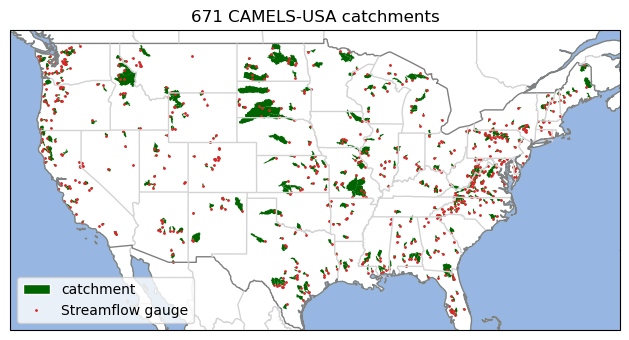

In [26]:
# set up background maps
ax = plt.axes(projection=ccrs.PlateCarree())
country_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='10m',
    facecolor='none')
ax.add_feature(country_borders, edgecolor='gray')

state_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')
ax.add_feature(state_borders, edgecolor='lightgray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, edgecolor='lightblue')

# add legend properties
ms = 1
color = "C3"
catchment_color = "darkgreen"
gdf_catchments.plot(ax=ax,facecolor=catchment_color)
gdf_gauges.plot(ax=ax,markersize=ms,color=color)

ax.set_title(f"{len(gdf_catchments)} CAMELS-USA catchments")
# add legend
legend_gauges = matplotlib.lines.Line2D([],[],color=color,markersize=ms,marker="o",linewidth=0,label='Streamflow gauge')
legend_catchments = matplotlib.patches.Patch(facecolor=catchment_color, edgecolor='w',label=f"catchment")
ax.legend(loc='best', handles=ax.get_legend_handles_labels()[0] + [legend_catchments,legend_gauges])
          
plt.tight_layout()
plt.savefig(fr'{figures_path}\CAMELS-USA-catchments-with_gauges.png',bbox_inches="tight")

In [27]:
649+26

675

In [28]:
hru_id_cal = ['01137500',
            '01139800',
            '01187300',
            '01052500',
            '01073000',
            '01181000',
            '01169000',
            '01013500',
            '01123000',
            '01055000',
            '01047000',
            '04296000',
            '01022500',
            '01134500',
            '01170100',
            '01142500',
            '01144000',
            '01054200',
            '01031500',
            '01139000',
            '01057000',
            '01078000',
            '01162500',
            '01030500',
            '01118300',
            '01121000']

In [29]:
for index, ids in enumerate(hru_id_cal):
    hru_id_cal[index] = int(ids)

In [30]:
gdf_callibration_catchment = gdf_catchments.set_index('hru_id').loc[hru_id_cal]
gdf_callibration_gauges = gdf_gauges.set_index('gauge_id').loc[hru_id_cal]

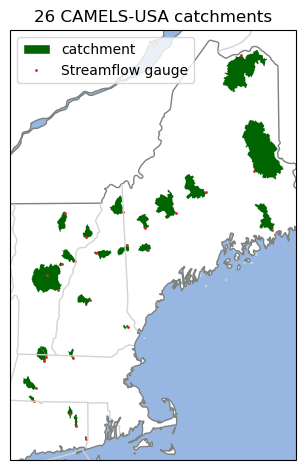

In [31]:
# set up background maps
ax = plt.axes(projection=ccrs.PlateCarree())
country_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='10m',
    facecolor='none')
ax.add_feature(country_borders, edgecolor='gray')

state_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')
ax.add_feature(state_borders, edgecolor='lightgray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, edgecolor='lightblue')

# add legend properties
ms = 1
color = "C3"
catchment_color = "darkgreen"
gdf_callibration_catchment.plot(ax=ax,facecolor=catchment_color)
gdf_callibration_gauges.plot(ax=ax,markersize=ms,color=color)

ax.set_title(f"{len(gdf_callibration_catchment)} CAMELS-USA catchments")
# add legend
legend_gauges = matplotlib.lines.Line2D([],[],color=color,markersize=ms,marker="o",linewidth=0,label='Streamflow gauge')
legend_catchments = matplotlib.patches.Patch(facecolor=catchment_color, edgecolor='w',label=f"catchment")
ax.legend(loc='best', handles=ax.get_legend_handles_labels()[0] + [legend_catchments,legend_gauges])
          
plt.tight_layout()
plt.savefig(figures_path / 'CAMELS-USA-catchments-with_gauges-callibration.png',bbox_inches="tight")

In [32]:
gdf_catchments_landcover = gdf_catchments.copy()
gdf_catchments['dom_land_cover'] = df_vege_indicators['dom_land_cover']

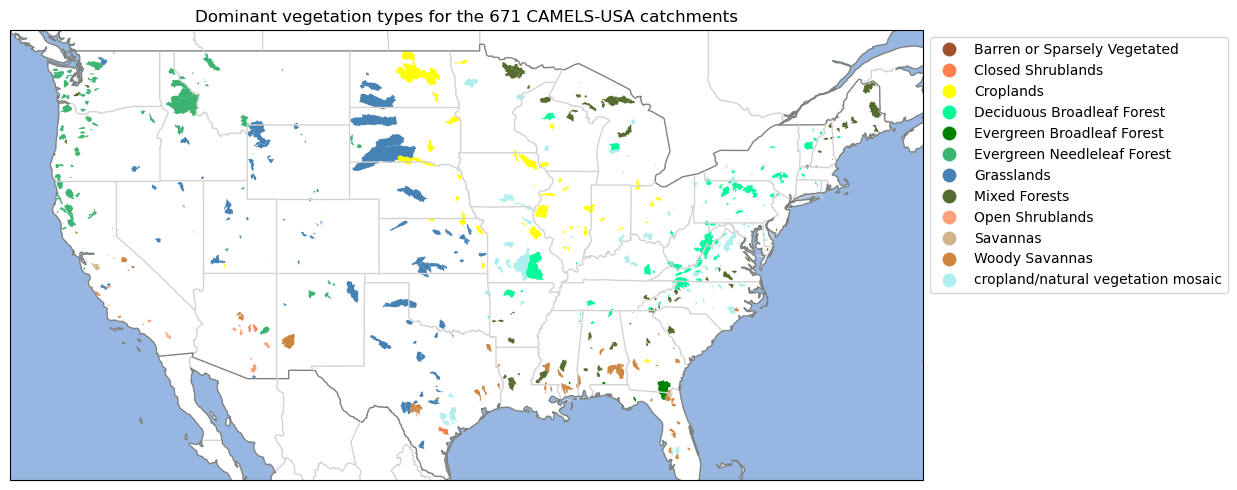

In [33]:
# set up background maps
plt.figure(figsize=(12,5))
ax = plt.axes(projection=ccrs.PlateCarree())
country_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='10m',
    facecolor='none')
ax.add_feature(country_borders, edgecolor='gray')

state_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')
ax.add_feature(state_borders, edgecolor='lightgray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, edgecolor='lightblue')

catchment_color = "darkgreen"
# https://matplotlib.org/stable/gallery/color/named_colors.html
custom_cmap = matplotlib.colors.ListedColormap(["sienna","coral","yellow","mediumspringgreen","green",
                                                "mediumseagreen","steelblue","darkolivegreen","lightsalmon","tan",
                                                "peru","paleturquoise"])
# custom_cmap = "tab20"
gdf_catchments.plot(ax=ax,column="dom_land_cover", cmap=custom_cmap, legend=True,
                    legend_kwds={"loc": "center left", "bbox_to_anchor": (1, .7)})

ax.set_title(f"Dominant vegetation types for the {len(gdf_catchments)} CAMELS-USA catchments")
          
plt.tight_layout()
plt.savefig(fr'{figures_path}\CAMELS-USA-catchments-dominant-vegetation-map.png',bbox_inches="tight")

In [34]:
gdf_catchments_geo = gdf_catchments.copy()
gdf_catchments_geo['geol_1st_class'] = df_geol_indicators['geol_1st_class']

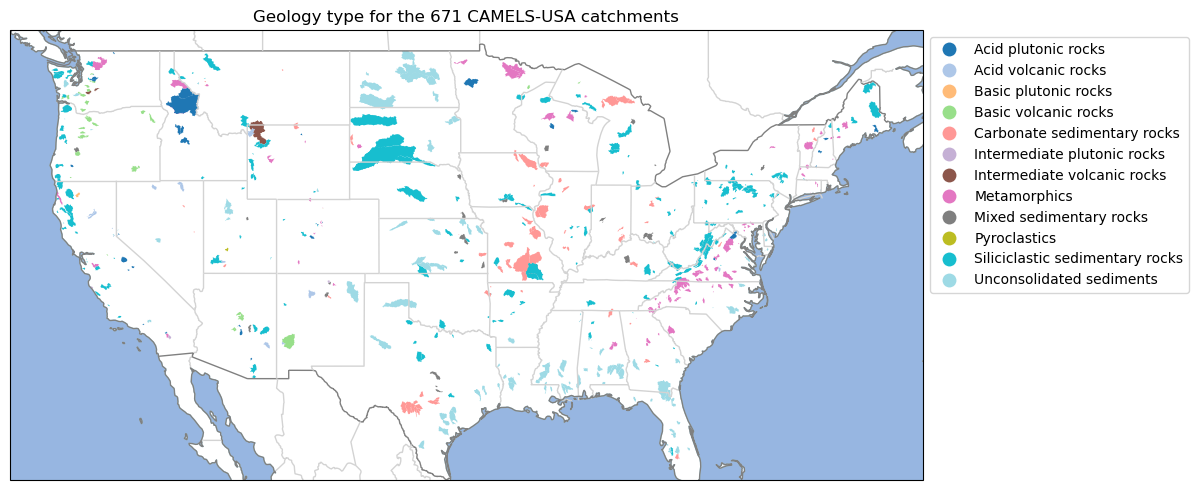

In [35]:
# set up background maps
plt.figure(figsize=(12,5))
ax = plt.axes(projection=ccrs.PlateCarree())
country_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='10m',
    facecolor='none')
ax.add_feature(country_borders, edgecolor='gray')

state_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')
ax.add_feature(state_borders, edgecolor='lightgray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, edgecolor='lightblue')

catchment_color = "darkgreen"
# custom_cmap = matplotlib.colors.ListedColormap(["sienna","coral","yellow","mediumspringgreen","green",
#                                                 "mediumseagreen","steelblue","darkgreen","lightsalmon","tan",
#                                                 "peru","paleturquoise"])
custom_cmap = "tab20"
gdf_catchments_geo.plot(ax=ax,column="geol_1st_class", cmap=custom_cmap, legend=True,
                    legend_kwds={"loc": "center left", "bbox_to_anchor": (1, .7)})

ax.set_title(f"Geology type for the {len(gdf_catchments)} CAMELS-USA catchments")
          
plt.tight_layout()
plt.savefig(fr'{figures_path}\CAMELS-USA-catchments-geology-map.png',bbox_inches="tight")

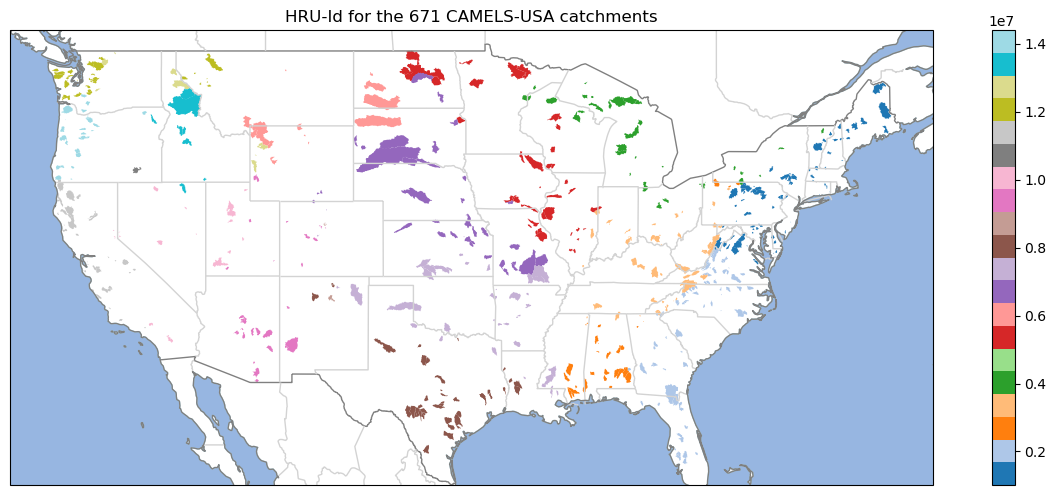

In [36]:
# set up background maps
plt.figure(figsize=(12,5))
ax = plt.axes(projection=ccrs.PlateCarree())
country_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='10m',
    facecolor='none')
ax.add_feature(country_borders, edgecolor='gray')

state_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')
ax.add_feature(state_borders, edgecolor='lightgray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, edgecolor='lightblue')

catchment_color = "darkgreen"
# custom_cmap = matplotlib.colors.ListedColormap(["sienna","coral","yellow","mediumspringgreen","green",
#                                                 "mediumseagreen","steelblue","darkgreen","lightsalmon","tan",
#                                                 "peru","paleturquoise"])
custom_cmap = "tab20"
gdf_catchments_geo.plot(ax=ax,column="hru_id", cmap=custom_cmap, legend=True )
                    # legend_kwds={"loc": "center left", "bbox_to_anchor": (1, .7)})

ax.set_title(f"HRU-Id for the {len(gdf_catchments)} CAMELS-USA catchments")
          
plt.tight_layout()
plt.savefig(fr'{figures_path}\CAMELS-USA-catchments-HRUI-map.png',bbox_inches="tight")

USA_extent = ax.get_extent()

In [37]:
gdf_catchments_clim = gdf_catchments.copy()
gdf_catchments_clim['frac_snow'] = df_clim_indicators['frac_snow']

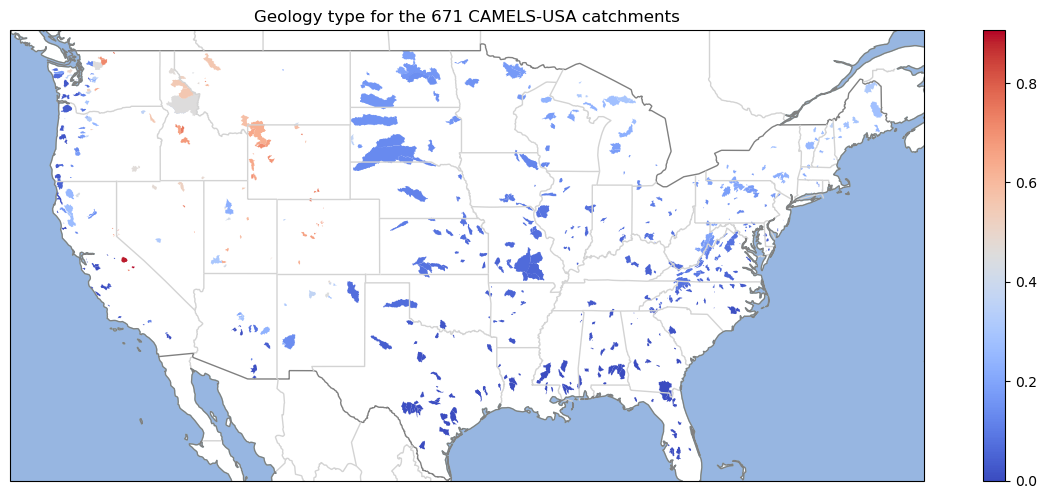

In [38]:
# set up background maps
plt.figure(figsize=(12,5))
ax = plt.axes(projection=ccrs.PlateCarree())
country_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='10m',
    facecolor='none')
ax.add_feature(country_borders, edgecolor='gray')

state_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')
ax.add_feature(state_borders, edgecolor='lightgray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, edgecolor='lightblue')

catchment_color = "darkgreen"
# custom_cmap = matplotlib.colors.ListedColormap(["sienna","coral","yellow","mediumspringgreen","green",
#                                                 "mediumseagreen","steelblue","darkgreen","lightsalmon","tan",
#                                                 "peru","paleturquoise"])
custom_cmap = "tab20"
gdf_catchments_clim.plot(ax=ax,column="frac_snow", cmap="coolwarm", legend=True)

ax.set_title(f"Geology type for the {len(gdf_catchments)} CAMELS-USA catchments")
          
plt.tight_layout()
plt.savefig(fr'{figures_path}\CAMELS-USA-catchments-geology-map.png',bbox_inches="tight")

In [39]:
USA_extent

(-127.27502975441944, -64.85323562638001, 25.8645493511459, 50.101112651929895)

In [40]:
df_clim_indicators.columns

Index(['gauge_id', 'p_mean', 'pet_mean', 'p_seasonality', 'frac_snow',
       'aridity', 'high_prec_freq', 'high_prec_dur', 'high_prec_timing',
       'low_prec_freq', 'low_prec_dur', 'low_prec_timing'],
      dtype='object')

In [41]:
df_clim_indicators[df_clim_indicators["frac_snow"] <= 0.1]

,gauge_id,p_mean,pet_mean,p_seasonality,frac_snow,aridity,high_prec_freq,high_prec_dur,high_prec_timing,low_prec_freq,low_prec_dur,low_prec_timing
31,1411300,3.175450,2.534944,0.048562,0.048095,0.798294,22.85,1.336257,son,261.70,4.681574,son
42,1466500,3.539837,3.059821,0.060312,0.062662,0.864396,23.45,1.257373,jja,257.65,4.480870,son
43,1484100,3.321273,2.602614,0.086187,0.042572,0.783620,23.45,1.208763,jja,256.90,4.361630,son
44,1485500,3.240579,2.630300,0.084383,0.031636,0.811676,22.55,1.199468,jja,257.90,4.419880,son
45,1486000,3.274416,2.674828,0.096185,0.030601,0.816887,22.80,1.222520,jja,258.05,4.399829,son
...,...,...,...,...,...,...,...,...,...,...,...,...
663,14306340,6.489867,2.444393,-0.957137,0.069380,0.376648,14.55,1.853503,djf,200.55,5.787879,jja
664,14306500,6.286938,2.963947,-0.955287,0.020298,0.471445,13.95,1.800000,djf,193.00,5.857360,jja
666,14309500,4.977781,3.122204,-0.995847,0.061255,0.627228,15.10,1.776471,djf,222.65,6.893189,jja
668,14325000,6.297437,2.434652,-0.952055,0.030203,0.386610,14.60,1.467337,djf,219.05,6.240741,jja


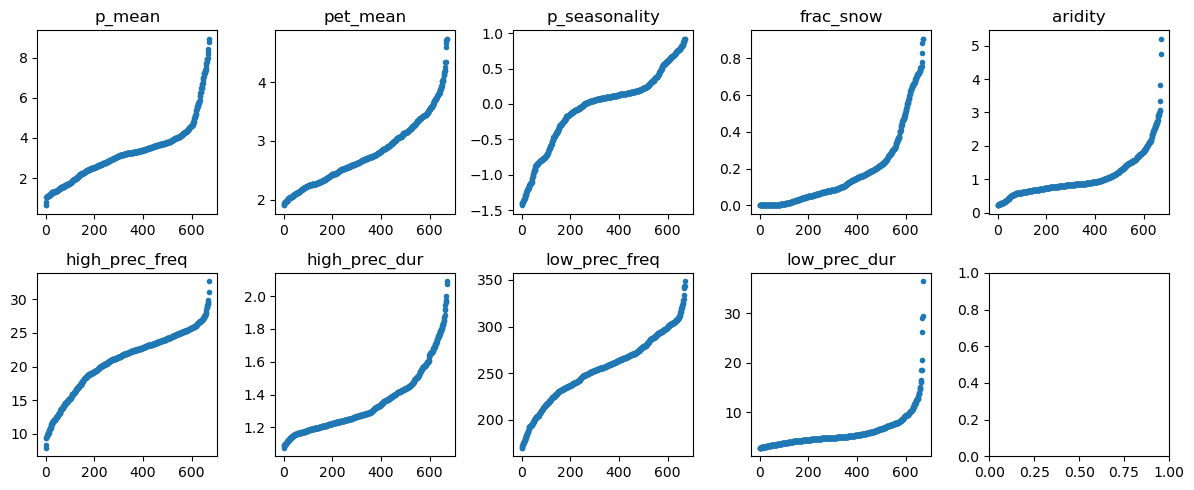

In [42]:
cols = df_clim_indicators.columns
exclude = ['gauge_id','high_prec_timing','low_prec_timing']
nfigs = len(cols)-len(exclude)
n = 2
fig, axs = plt.subplots(n, int(nfigs/n)+1,figsize=(12,5))
ax = axs.flatten()
i = 0
for col in cols:
    if col in exclude: pass
    else: 
        series = df_clim_indicators[col].sort_values().values
        ax[i].plot(series,lw=0, marker=".")
        ax[i].set_title(col)
        i+=1

fig.tight_layout()

In [43]:
gdf_catchments

,hru_id,ann_P,lon_cen,lat_cen,AREA,elev_mean,ave_T,july_T,Perimeter,geometry,dom_land_cover
0,1013500,0.0,-68.56551,47.01169,2.303988e+09,277.493490,None,None,647993,"MULTIPOLYGON (((-68.35650 46.90311, -68.35612 ...",Mixed Forests
1,1022500,0.0,-68.07313,44.79691,6.203873e+08,103.604200,None,None,312624,"POLYGON ((-67.97836 44.61310, -67.97800 44.613...",Mixed Forests
2,1030500,0.0,-68.14985,45.80527,3.676155e+09,174.433896,None,None,662248,"MULTIPOLYGON (((-67.83991 45.36614, -67.83955 ...",Mixed Forests
3,1031500,0.0,-69.58119,45.23568,7.665447e+08,304.743490,None,None,309614,"MULTIPOLYGON (((-69.33810 45.12317, -69.33800 ...",Mixed Forests
4,1047000,0.0,-70.16213,44.98744,9.049562e+08,379.779978,None,None,310157,"POLYGON ((-70.10847 45.21669, -70.10858 45.216...",Mixed Forests
...,...,...,...,...,...,...,...,...,...,...,...
666,14309500,0.0,-123.74216,42.83017,2.263143e+08,737.623894,None,None,117484,"POLYGON ((-123.81322 42.89103, -123.81312 42.8...",Evergreen Needleleaf Forest
667,14316700,0.0,-122.64677,43.45290,5.880250e+08,947.553082,None,None,176861,"POLYGON ((-122.49936 43.47688, -122.49972 43.4...",Evergreen Needleleaf Forest
668,14325000,0.0,-124.02763,42.79249,4.449257e+08,649.241611,None,None,166110,"POLYGON ((-124.07751 42.89822, -124.07716 42.8...",Evergreen Needleleaf Forest
669,14362250,0.0,-123.12535,42.16583,4.387790e+07,939.577778,None,None,44972,"POLYGON ((-123.15128 42.19624, -123.15118 42.1...",Evergreen Needleleaf Forest


deciduous_catchment_eastcoast

In [44]:
# deciduous_catchment_eastcoast = gdf_catchments_geo[(gdf_catchments_geo['hru_id']<2_000_000) &  (gdf_catchments_geo['dom_land_cover']=="Deciduous Broadleaf Forest")]
# chosen_catchment = deciduous_catchment_eastcoast.sort_values("lat_cen",ascending=True).iloc[[0]]

low_snow_factor

In [45]:
# low_snow_factor = df_clim_indicators[df_clim_indicators["frac_snow"] <= 0.1].iloc[[0]].gauge_id.values[0]
# chosen_catchment = gdf_catchments[gdf_catchments['hru_id']  == low_snow_factor]

high_p_mean

In [46]:
high_p_mean = df_clim_indicators[df_clim_indicators["p_mean"] >= 8].iloc[[-1]].gauge_id.values[0]
chosen_catchment = gdf_catchments[gdf_catchments['hru_id']  == high_p_mean]

large

In [47]:
# gdf_catchments_area = gdf_catchments.copy()
# gdf_catchments_area['area'] = gdf_catchments.area
# large_area = gdf_catchments_area.sort_values('area').iloc[-1].hru_id   
# chosen_catchment = gdf_catchments[gdf_catchments['hru_id']  == large_area]

In [48]:
# low_ish = df_topo_indicators.sort_values('elev_mean').iloc[50]
# chosen_catchment = gdf_catchments[gdf_catchments['hru_id']  == low_ish.gauge_id]

In [49]:
chosen_catchment = gdf_catchments[gdf_catchments['hru_id']  == 14138900]

In [50]:
chosen_gauge = gdf_gauges[gdf_gauges['gauge_id']==chosen_catchment.hru_id.iloc[0]]
gauge_name = df_catchment_names.set_index('gauge_id').loc[chosen_gauge.gauge_id.values,'gauge_name'].values[0]

In [51]:
buffer_chosen_catchment = chosen_catchment.buffer(1.5)

/tmp/ipykernel_442975/835329502.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffer_chosen_catchment = chosen_catchment.buffer(1.5)


In [52]:
chosen_gauge

,gauge_id,gauge_lat,gauge_lon,elev_mean,slope_mean,area_gages2,area_geospa_fabric,geometry
646,14138900,45.49429,-122.03592,757.32,93.62395,21.68,21.99,POINT (-122.03592 45.49429)


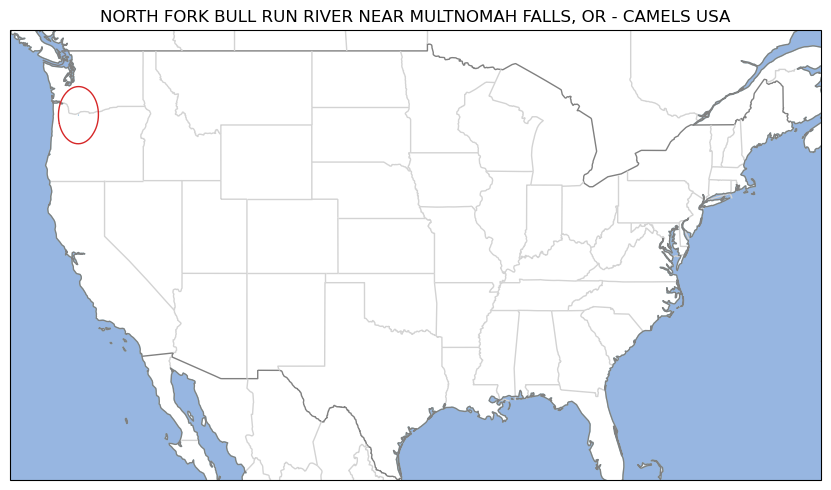

In [53]:
plt.figure(figsize=(12,5))
ax = plt.axes(projection=ccrs.PlateCarree())
country_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='10m',
    facecolor='none')
ax.add_feature(country_borders, edgecolor='gray')

state_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')
ax.add_feature(state_borders, edgecolor='lightgray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, edgecolor='lightblue')

catchment_color = "darkgreen"
# custom_cmap = matplotlib.colors.ListedColormap(["sienna","coral","yellow","mediumspringgreen","green",
#                                                 "mediumseagreen","steelblue","darkgreen","lightsalmon","tan",
#                                                 "peru","paleturquoise"])
# custom_cmap = "tab20"
# gdf_catchments_geo.plot(ax=ax,column="hru_id", cmap=custom_cmap, legend=True )
#                     # legend_kwds={"loc": "center left", "bbox_to_anchor": (1, .7)})
chosen_catchment.plot(ax=ax)
buffer_chosen_catchment.plot(ax=ax,facecolor="None", edgecolor="C3",zorder=10)

ax.set_title(f"{gauge_name} - CAMELS USA")

ax.set_xlim((USA_extent[0]),USA_extent[1])
ax.set_ylim((USA_extent[2]),USA_extent[3])

plt.tight_layout()
plt.savefig(fr'{figures_path}\CAMELS-USA-catchments-{chosen_gauge.gauge_id.values[0]}-map.png',bbox_inches="tight")


In [54]:
import contextily as cx

In [55]:
# buffer_chosen_catchment = chosen_catchment.buffer(0.15)

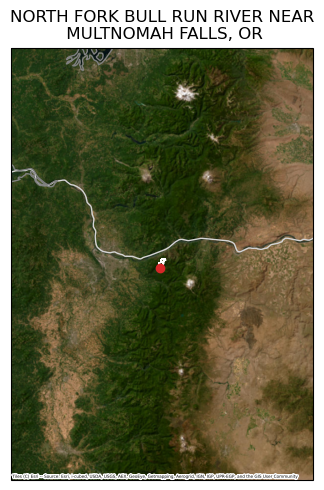

In [56]:
plt.figure(figsize=(12,5))
ax = plt.axes(projection=ccrs.PlateCarree())
country_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='10m',
    facecolor='none')
ax.add_feature(country_borders, edgecolor='gray')

state_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')
ax.add_feature(state_borders, edgecolor='lightgray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, edgecolor='lightblue')

catchment_color = "darkgreen"
# custom_cmap = matplotlib.colors.ListedColormap(["sienna","coral","yellow","mediumspringgreen","green",
#                                                 "mediumseagreen","steelblue","darkgreen","lightsalmon","tan",
#                                                 "peru","paleturquoise"])
# custom_cmap = "tab20"
# gdf_catchments_geo.plot(ax=ax,column="hru_id", cmap=custom_cmap, legend=True )
#                     # legend_kwds={"loc": "center left", "bbox_to_anchor": (1, .7)})
chosen_catchment.plot(ax=ax,facecolor="None",edgecolor="w")
buffer_chosen_catchment.plot(ax=ax,facecolor="None", edgecolor="None",zorder=10)
line_length = 30 
if len(gauge_name) > line_length:
    ax.set_title(f"{gauge_name[:line_length]}\n{gauge_name[line_length:]}")
else:
    ax.set_title(f"{gauge_name}")

cx.add_basemap(ax,source=cx.providers.Esri.WorldImagery, crs='EPSG:4326',attribution_size=3)
chosen_gauge.plot(ax=ax,color="C3")
# ax.set_xlim((USA_extent[0]),USA_extent[1])
# ax.set_ylim((USA_extent[2]),USA_extent[3])

plt.tight_layout()
plt.savefig(fr'{figures_path}\CAMELS-USA-catchments-{chosen_gauge.gauge_id.values[0]}-map.png',bbox_inches="tight")


# load

In [57]:
HRU_id = chosen_catchment.hru_id.iloc[0]
HRU_id = "1333000"

In [58]:
data_path

PosixPath('/media/davidhaasnoot/files/large_data_sets/CAMELS')

In [59]:
forcing_path = data_path / "basin_timeseries_v1p2_metForcing_obsFlow" / "basin_dataset_public_v1p2" / "basin_mean_forcing" / "daymet"

In [60]:
data_file = forcing_path / "02" / f"0{HRU_id}_lump_cida_forcing_leap.txt" 

In [61]:
(forcing_path/"02").exists()

True

In [62]:
# first 3 line contain data
data = {}
with open(data_file,'r') as fin:
    line_n = 0
    for line in fin:
        if line_n == 0: 
            data["lat"] = float(line.strip())
        elif line_n == 1: 
            data["elevation(m)"] = float(line.strip())
        elif line_n == 2: 
            data["area basin(m^2)"] = float(line.strip())
        elif line_n ==3:
            header = line.strip()
        else:
            break
        line_n +=1

In [63]:
data

{'lat': 42.54, 'elevation(m)': 482.0, 'area basin(m^2)': 110286331.0}

In [64]:
headers = header.split(' ')[3:]
headers[0] = "YYYY MM DD HH"

In [65]:
df = pd.read_csv(data_file,skiprows=4,delimiter="\t",names=headers)
df.index = df.apply(lambda x: pd.Timestamp(x["YYYY MM DD HH"][:-3]),axis=1)
df.drop(columns="YYYY MM DD HH",inplace=True)
df.index.name = "time"
new_names = [item.split('(')[0] for item in list(df.columns)]
rename_dict = dict(zip(headers[1:],new_names))
df.rename(columns=rename_dict,inplace=True)
rename_dict2 = {'prcp':'pr',
                'tmax':'tasmax',
                'tmin':'tasmin'}
df.rename(columns=rename_dict2,inplace=True)

In [66]:
df['test1'] = 30

In [67]:
df

,dayl,pr,srad,swe,tasmax,tasmin,vp,test1
time,,,,,,,,
1980-01-01,32140.80,0.00,208.36,0.0,0.93,-9.09,311.22,30
1980-01-02,32140.80,0.00,168.89,0.0,-0.83,-8.35,320.00,30
1980-01-03,32140.80,0.00,213.35,0.0,0.11,-10.04,279.39,30
1980-01-04,32273.14,0.00,206.83,0.0,-5.54,-14.96,198.20,30
1980-01-05,32486.40,0.00,174.30,0.0,-4.21,-11.56,244.03,30
...,...,...,...,...,...,...,...,...
2014-12-27,32119.74,0.00,226.75,0.0,6.80,-4.85,429.39,30
2014-12-28,32140.80,10.19,153.92,0.0,7.15,-1.83,536.88,30
2014-12-29,32140.80,0.00,176.83,0.0,1.17,-5.46,408.63,30


In [68]:
attrs = {"title": "HBV forcing data",
         "history": "Created by ewatercycle_HBV.forcing.HBVForcing.to_xarray()",
         "units": "daylight(s), precipitation(mm/day), mean radiation(W/m2), snow water equivalen(mm), temperature max(C), temperature min(C), vapour pressure(Pa)",}
attrs.update(data)

In [69]:
ds = xr.Dataset(data_vars=df,
                attrs=attrs,
                )
ds

<xarray.Dataset> Size: 920kB
Dimensions:  (time: 12784)
Coordinates:
  * time     (time) datetime64[ns] 102kB 1980-01-01 1980-01-02 ... 2014-12-31
Data variables:
    dayl     (time) float64 102kB 3.214e+04 3.214e+04 ... 3.214e+04 3.214e+04
    pr       (time) float64 102kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 10.19 0.0 0.0 0.0
    srad     (time) float64 102kB 208.4 168.9 213.3 206.8 ... 176.8 214.8 205.6
    swe      (time) float64 102kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    tasmax   (time) float64 102kB 0.93 -0.83 0.11 -5.54 ... 1.17 -3.85 -5.97
    tasmin   (time) float64 102kB -9.09 -8.35 -10.04 ... -5.46 -12.84 -14.02
    vp       (time) float64 102kB 311.2 320.0 279.4 198.2 ... 408.6 232.3 208.8
    test1    (time) int64 102kB 30 30 30 30 30 30 30 30 ... 30 30 30 30 30 30 30
Attributes:
    title:            HBV forcing data
    history:          Created by ewatercycle_HBV.forcing.HBVForcing.to_xarray()
    units:            daylight(s), precipitation(mm/day), mean radiation(W/m2...
    lat:              42.54
    elevation(m):     482.0
    area basin(m^2):  110286331.0

In [70]:
df_clim_indicators.set_index('gauge_id').loc[1620500].frac_snow   

0.123997407649528

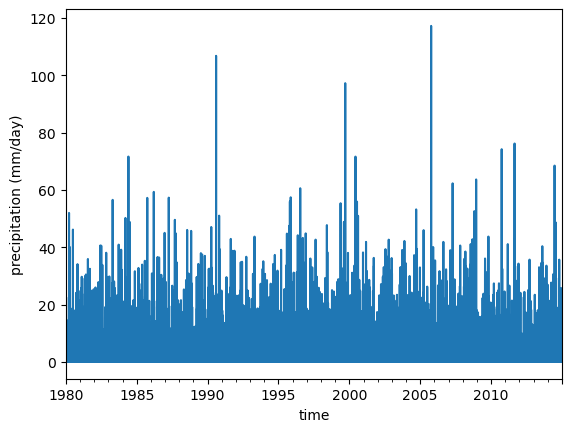

In [71]:
df['pr'].plot()
plt.ylabel('precipitation (mm/day)');

<Axes: xlabel='time'>

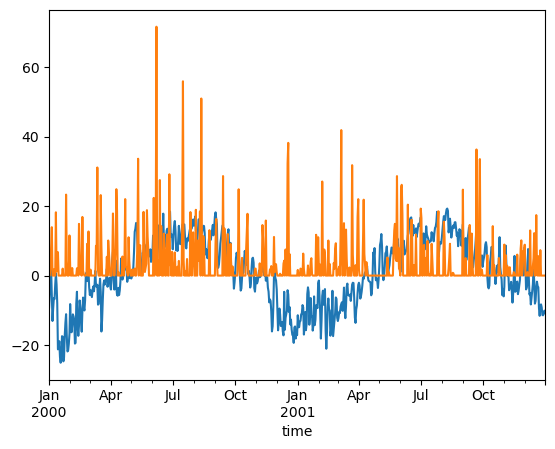

In [72]:
# no snow!!

df['tasmin'].loc["2000":"2001"].plot()
df['pr'].loc["2000":'2001'].plot()

# calculate Evaporation

[Explained on pg6](https://hess.copernicus.org/articles/19/209/2015/hess-19-209-2015.pdf) \
Possibly try: [this](https://github.com/neuralhydrology/neuralhydrology/blob/master/neuralhydrology/datautils/pet.py), but way more complex

$PET = \frac{\alpha}{\lambda} \frac{s (R_n - G)}{s + \gamma}$ \
Where: \
$\lambda$ latent heat of vaporization = 2.45 $\times 10^6$(J/kg) \
$R_n$ net radiation estimate in J/m$^2$/d \
$G$ is soil heat flux = 0 in a dag \
$s$ or $\Delta$ is the slope of the saturation vapor pressure relationship kPa/$^\circ$C)\
$\gamma$ is psychrometric constant (kPa/$^\circ$C)

$\alpha$ is provided by camels

In [73]:
LAMBDA = 2.45 * 10**6       #  J/kg
GAMMA = 0.066               # psychrometer constant (kPa/C) 
w_m2_j_s = 3600 * 24        # w/m^2 to: net radiation on the earth's surface (J/d/m^2): 1W = J/s

$\Delta=\frac{4098\left[0.6108 \exp \left(\frac{17.27 \mathrm{~T}}{\mathrm{~T}+237.3}\right)\right]}{(\mathrm{T}+237.3)^2}$

[Slope of saturation vapour pressure curve (eq3.6)](https://www.ipcinfo.org/fileadmin/user_upload/faowater/docs/ReferenceManualV32.pdf)

Or: [Equation 13 FAO-56 Allen et al. (1998)](https://www.fao.org/3/X0490E/x0490e07.htm#calculation%20procedures)

In [74]:
ouput_path = r'D:\large_data_sets\CAMELS\basin_timeseries_v1p2_modelOutput_daymet\model_output_daymet\model_output\flow_timeseries\daymet'

In [75]:
parameter_file = fr'{ouput_path}\02\0{HRU_id}_*_model_parameters.txt'

In [76]:
files = glob.glob(parameter_file)

In [77]:
line_start = "pet_coef"
lst_alpha = []
for file in files:
    with open(file,'r') as lines:
        for line in lines:
            if line[:len(line_start)] == line_start:
                lst_alpha.append(float(line.strip().split("\t")[-1]))

In [78]:
lst_alpha

[]

In [79]:
alpha = np.array(lst_alpha).mean()

/tmp/ipykernel_442975/4056158881.py:1: RuntimeWarning: Mean of empty slice.
  alpha = np.array(lst_alpha).mean()
/home/davidhaasnoot/anaconda3/envs/geo/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [80]:
alpha

nan

In [81]:
G = 0 # on average across a day

In [82]:
1/0.0864

11.574074074074073

In [83]:
def calc_PET(s_rad, t_min, t_max, doy, alpha, elev, lat):
    """
    calculates Potential Evaporation using Priestly–Taylor PET estimate, callibrated with longterm P-T trends from the camels data set (alpha). 
    -------
    Params:
    Rn: net radiation estimate in W/m^2: converted to J/m^2/d
    s: (aka delta), is the slope of the saturation vapor pressure relationship in kPa/degC 
    alpha: factor callibrated from longterm P-T trend compensating for lack of other data.
    -------
    Assumptions:
    G = 0 in a day: no loss to ground. 

    -------
    reference:

    based on code from:
    https://github.com/neuralhydrology/neuralhydrology/blob/master/neuralhydrology/datautils/pet.py
    kratzert et al. 2022
    NeuralHydrology --- A Python library for Deep Learning research in hydrology,
    Frederik Kratzert and Martin Gauch and Grey Nearing and Daniel Klotz, 
    https://doi.org/10.21105/joss.04050

    Who base on allen et al. (1998) 'FOA 56' & Newman et al (2015) 'CAMELS dataset'
    
    """
    G = 0 
    LAMBDA = 2.45       #  MJ/kg
    
    s_rad = s_rad * 0.0864      # conversion Wm-2 -> MJm-2day-1  
    albedo = 0.23               # planetary albedo
    in_sw_rad = (1 - albedo) * s_rad

    # solar declination
    sol_dec = 0.409 * np.sin((2 * np.pi) / 365 * doy - 1.39) # Equation 24 FAO-56 Allen et al. (1998)

    # Sunset hour angle
    lat = lat * (np.pi / 180)  # degree to rad
    term = -np.tan(lat) * np.tan(sol_dec) 
    term[term < -1] = -1
    term[term > 1] = 1
    sha = np.arccos(term)

    # Inverse relative distance between Earth and Sun:
    ird = 1 + 0.033 * np.cos((2 * np.pi) / 365 * doy) #  Equation 23 FAO-56 Allen et al. (1998)

    # Extraterrestrial Radiation -  Equation 21 FAO-56 Allen et al. (1998)
    et_rad = ((24 * 60) / np.pi * 0.082 * ird) * (sha * np.sin(lat) * np.sin(sol_dec) + np.cos(lat) * np.cos(sol_dec) * np.sin(sha))

    # Clear sky radiation Equation 37 FAO-56 Allen et al. (1998)
    cs_rad = (0.75 + 2 * 10e-5 * elev) * et_rad

    # Actual vapor pressure estimated using min temperature - Equation 48 FAO-56 Allen et al. (1998
    avp = 0.611 * np.exp((17.27 * t_min) / (t_min + 237.3))

    # Net outgoing longwave radiation - Equation 49 FAO-56 Allen et al. (1998)
    term1 = ((t_max + 273.16)**4 + (t_min + 273.16)**4) / 2  # conversion in K in equation
    term2 = 0.34 - 0.14 * np.sqrt(avp)
    term3 = 1.35 * s_rad / cs_rad - 0.35
    stefan_boltzman = 4.903e-09
    out_lw_rad = stefan_boltzman * term1 * term2 * term3
    
    # psychrometer constant (kPa/C) - varies with altitude
    temp = (293.0 - 0.0065 * elev) / 293.0
    atm_pressure = np.power(temp, 5.26) * 101.3  # Equation 7 FAO-56 Allen et al. (1998)
    gamma = 0.000665 * atm_pressure         

    # Slope of saturation vapour pressure curve Equation 13 FAO-56 Allen et al. (1998) 
    t_mean = 0.5 * (t_min + t_max)
    s = 4098 * (0.6108 * np.exp((17.27 * t_mean) / (t_mean + 237.3))) / ((t_mean + 237.3)**2)

    Rn = in_sw_rad - out_lw_rad
    PET = ((alpha /  LAMBDA) * s * (Rn - G) ) / (s + gamma)
    return PET * 0.408 # energy to evap

In [84]:
ds

<xarray.Dataset> Size: 920kB
Dimensions:  (time: 12784)
Coordinates:
  * time     (time) datetime64[ns] 102kB 1980-01-01 1980-01-02 ... 2014-12-31
Data variables:
    dayl     (time) float64 102kB 3.214e+04 3.214e+04 ... 3.214e+04 3.214e+04
    pr       (time) float64 102kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 10.19 0.0 0.0 0.0
    srad     (time) float64 102kB 208.4 168.9 213.3 206.8 ... 176.8 214.8 205.6
    swe      (time) float64 102kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    tasmax   (time) float64 102kB 0.93 -0.83 0.11 -5.54 ... 1.17 -3.85 -5.97
    tasmin   (time) float64 102kB -9.09 -8.35 -10.04 ... -5.46 -12.84 -14.02
    vp       (time) float64 102kB 311.2 320.0 279.4 198.2 ... 408.6 232.3 208.8
    test1    (time) int64 102kB 30 30 30 30 30 30 30 30 ... 30 30 30 30 30 30 30
Attributes:
    title:            HBV forcing data
    history:          Created by ewatercycle_HBV.forcing.HBVForcing.to_xarray()
    units:            daylight(s), precipitation(mm/day), mean radiation(W/m2...
    lat:              42.54
    elevation(m):     482.0
    area basin(m^2):  110286331.0

In [85]:
ds.attrs

{'title': 'HBV forcing data',
 'history': 'Created by ewatercycle_HBV.forcing.HBVForcing.to_xarray()',
 'units': 'daylight(s), precipitation(mm/day), mean radiation(W/m2), snow water equivalen(mm), temperature max(C), temperature min(C), vapour pressure(Pa)',
 'lat': 42.54,
 'elevation(m)': 482.0,
 'area basin(m^2)': 110286331.0}

In [86]:
ds['pev']= calc_PET(ds['srad'], 
                    ds["tasmin"].values,
                    ds["tasmax"].values , 
                    df.index.dayofyear.values,
                    alpha,
                    ds.attrs['elevation(m)'],
                    ds.attrs['lat']
                    )

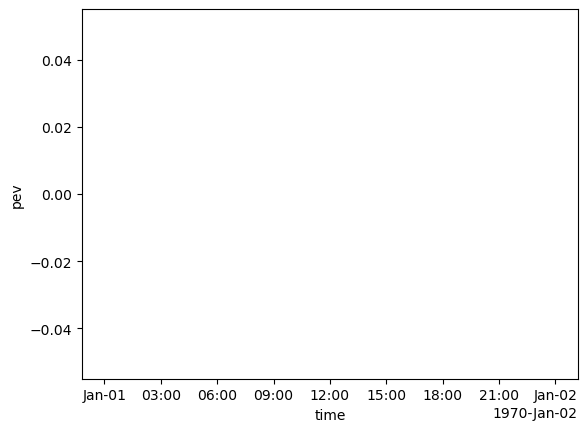

In [87]:
ds['pev'].plot()

In [88]:
experiment_start_date = "1997-08-01T00:00:00Z"
experiment_end_date = "2000-08-31T00:00:00Z"

In [89]:
start = np.datetime64(experiment_start_date)
end = np.datetime64(experiment_end_date)

/tmp/ipykernel_442975/695523228.py:1: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start = np.datetime64(experiment_start_date)
/tmp/ipykernel_442975/695523228.py:2: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end = np.datetime64(experiment_end_date)


In [90]:
ds['tas'] = (ds['tasmax'] + ds['tasmin']) /2

In [91]:
ds

<xarray.Dataset> Size: 1MB
Dimensions:  (time: 12784)
Coordinates:
  * time     (time) datetime64[ns] 102kB 1980-01-01 1980-01-02 ... 2014-12-31
Data variables:
    dayl     (time) float64 102kB 3.214e+04 3.214e+04 ... 3.214e+04 3.214e+04
    pr       (time) float64 102kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 10.19 0.0 0.0 0.0
    srad     (time) float64 102kB 208.4 168.9 213.3 206.8 ... 176.8 214.8 205.6
    swe      (time) float64 102kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    tasmax   (time) float64 102kB 0.93 -0.83 0.11 -5.54 ... 1.17 -3.85 -5.97
    tasmin   (time) float64 102kB -9.09 -8.35 -10.04 ... -5.46 -12.84 -14.02
    vp       (time) float64 102kB 311.2 320.0 279.4 198.2 ... 408.6 232.3 208.8
    test1    (time) int64 102kB 30 30 30 30 30 30 30 30 ... 30 30 30 30 30 30 30
    pev      (time) float64 102kB nan nan nan nan nan ... nan nan nan nan nan
    tas      (time) float64 102kB -4.08 -4.59 -4.965 ... -2.145 -8.345 -9.995
Attributes:
    title:            HBV forcing data
    history:          Created by ewatercycle_HBV.forcing.HBVForcing.to_xarray()
    units:            daylight(s), precipitation(mm/day), mean radiation(W/m2...
    lat:              42.54
    elevation(m):     482.0
    area basin(m^2):  110286331.0

In [92]:
ds.isel(time=(ds['time'].values >= start) & ((ds['time'].values <= end)))

<xarray.Dataset> Size: 99kB
Dimensions:  (time: 1127)
Coordinates:
  * time     (time) datetime64[ns] 9kB 1997-08-01 1997-08-02 ... 2000-08-31
Data variables:
    dayl     (time) float64 9kB 5.149e+04 5.149e+04 ... 4.666e+04 4.666e+04
    pr       (time) float64 9kB 0.0 0.0 0.0 7.01 14.81 ... 0.0 0.0 0.0 0.0 0.0
    srad     (time) float64 9kB 485.8 389.0 335.8 276.6 ... 342.1 409.6 382.1
    swe      (time) float64 9kB 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    tasmax   (time) float64 9kB 27.65 26.01 26.58 25.47 ... 23.84 23.88 25.5
    tasmin   (time) float64 9kB 10.25 13.84 16.29 14.1 ... 14.6 11.59 14.05
    vp       (time) float64 9kB 1.254e+03 1.583e+03 ... 1.367e+03 1.602e+03
    test1    (time) int64 9kB 30 30 30 30 30 30 30 30 ... 30 30 30 30 30 30 30
    pev      (time) float64 9kB nan nan nan nan nan nan ... nan nan nan nan nan
    tas      (time) float64 9kB 18.95 19.93 21.43 19.79 ... 19.22 17.73 19.77
Attributes:
    title:            HBV forcing data
    history:          Created by ewatercycle_HBV.forcing.HBVForcing.to_xarray()
    units:            daylight(s), precipitation(mm/day), mean radiation(W/m2...
    lat:              42.54
    elevation(m):     482.0
    area basin(m^2):  110286331.0

# load caravan

In [93]:
# data_path = r'D:\large_data_sets\Caravan\timeseries\netcdf\camels\camels_01022500.nc'

In [94]:
# ds_camels = xr.open_dataset(data_path)

In [95]:
# ds_camels.data_vars